## Задачи для совместного разбора

1\. Дана функция $f(x) = x^2$. Найдите производную этой функции различными способами

In [ ]:
def f(x: float) -> float:
  return x**2

In [ ]:
def dfdx(x: float) -> float:
  return 2 * x

In [ ]:
f(2), dfdx(2)

(4, 4)

In [ ]:
from typing import Callable


def dfdx_finite(f: Callable, x: float, h: float) -> float:
  return (f(x+h) - f(x)) / h

In [ ]:
dfdx_finite(f, 2, 1e-5)

4.000010000027032

In [ ]:
import torch as th

In [ ]:
x = th.tensor(10.0, requires_grad=True)
x

tensor(10., requires_grad=True)

In [ ]:
def g(x: th.Tensor) -> th.Tensor:
  return x ** 2

In [ ]:
y = g(x)
y

tensor(100., grad_fn=<PowBackward0>)

In [ ]:
y.backward()

In [ ]:
x.grad # dy/dx

tensor(20.)

In [ ]:
type(x)

torch.Tensor

In [ ]:
th.tensor

<function torch._VariableFunctionsClass.tensor>

In [ ]:
x = th.tensor(10.0, requires_grad=True)
y = f(x)
y.backward()
grad = x.grad

gamma = 0.01
# x = x - gamma * grad
x -= gamma * grad

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [ ]:
x = th.tensor([10.0, 20.0, 30.0], requires_grad=True)
y = g(x)
# y = [x1**2, x2**2, x3**2]
y.backward()

In [ ]:
x1, x2, x3 = x
J = th.tensor(
    [[2*x1, 0, 0],
    [0, 2*x2, 0],
    [0, 0, 2*x3],]
)
J

tensor([[20.,  0.,  0.],
        [ 0., 40.,  0.],
        [ 0.,  0., 60.]])

In [ ]:
z = th.ones((3, 1))
J @ z

tensor([[20.],
        [40.],
        [60.]])

In [ ]:
x = th.tensor([10.0, 20.0, 30.0], requires_grad=True)
y = g(x)
# y = [x1**2, x2**2, x3**2]
y.backward(th.ones((3, )))
x.grad

tensor([20., 40., 60.])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Дана функция $f(x)$. Найдите (аналитически) производную данной функции $f'(x)$ и реализуйте две этих функции. Постройте в одной системе координат графики $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [1, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [ ]:
# from sympy import diff, symbols, cos, sin, log, simplify
# x, y = symbols('x y')
# simplify(diff(sin(x)/(log(x)+1)))

(x*(log(x) + 1)*cos(x) - sin(x))/(x*(log(x) + 1)**2)

In [ ]:
# simplify(-cos(x)*(log(x)+1) - sin(x)/x)/((log(x)+1)**2)

(-x*(log(x) + 1)*cos(x) - sin(x))/(x*(log(x) + 1)**2)

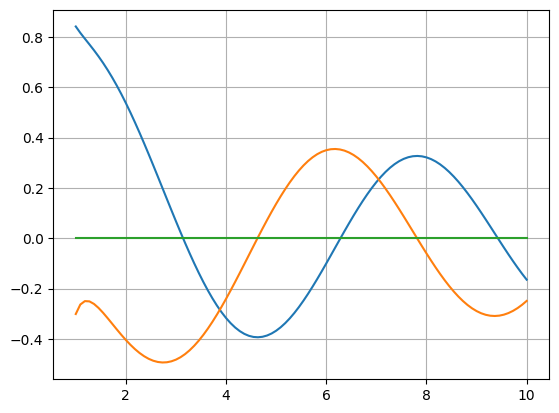

In [ ]:
import matplotlib.pyplot as plt
import torch as th

fx = lambda x: th.sin(x)/(th.log(x)+1)
dfdx = lambda x: (th.cos(x)*(th.log(x)+1) - th.sin(x)/x)/((th.log(x)+1)**2)
gx = lambda x: 0*x

x = th.linspace(1,10,100)
plt.plot(x, fx(x)) #синий
plt.plot(x, dfdx(x)) #красный
plt.plot(x, gx(x)) #зеленый
plt.grid(True)
plt.show()

<p class="task" id="2"></p>

2\. Дана функция $f(x)$. Найдите (численно) производную данной функции $f'(x)$ на отрезке [1, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

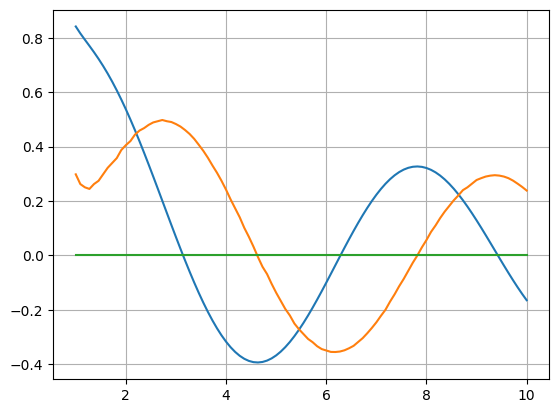

In [ ]:
import matplotlib.pyplot as plt
import torch as th

fx = lambda x: th.sin(x)/(th.log(x)+1)
dfdx_dm = lambda x, eps: (fx(x)-fx(x+eps))/eps
gx = lambda x: 0*x

x = th.linspace(1,10,100)
plt.plot(x, fx(x)) #синий
plt.plot(x, dfdx_dm(x, 1e-5)) #красный
plt.plot(x, gx(x)) #зеленый
plt.grid(True)
plt.show()

<p class="task" id="3"></p>

3\. Найдите локальный минимум функции $f(x)$ при помощи метода градиентного спуска. В качестве начальной точки используйте $x_0 = 4$. Найдите локальный максимум этой же функции, используя в качестве начальной точки $x_0'=9$.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [ ]:
# th.tensor()
gamma = 0.03
x_mx = 9
x_min = 4
for _ in range(0,10000):
    tens_x_min = th.tensor([x_mx])
    tens_x_max = th.tensor([x_min])
    x_mx += gamma*dfdx(tens_x_min)
    x_min -= gamma*dfdx(tens_x_max)
x_mx, x_min

(tensor([7.8121]), tensor([4.6272]))

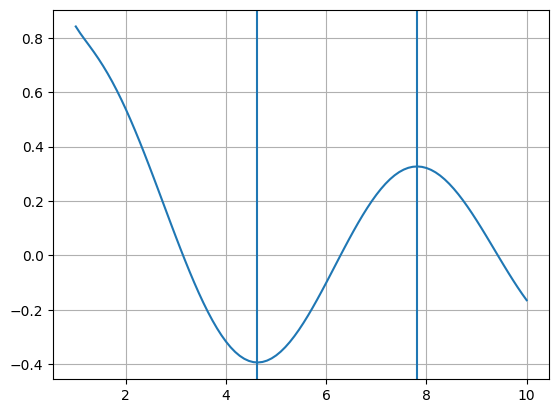

In [ ]:
import matplotlib.pyplot as plt
import torch as th

fx = lambda x: th.sin(x)/(th.log(x)+1)


x = th.linspace(1,10,100)
plt.plot(x, fx(x)) #синий
plt.axvline (x=x_mx)
plt.axvline (x=x_min)
plt.grid(True)
plt.show()

<p class="task" id="4"></p>

4\. Дана функция $f(x)$. Найдите (используя возможности по автоматическому дифференцированию пакета `torch`) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на полуинтервале (0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [ ]:
fx = lambda x: th.sin(x)/(th.log(x)+1)

x = x = th.linspace(1, 10, 100, requires_grad=True)
y = fx(x)
y.backward(th.ones_like(x))
Xgrad = x.grad
Xgrad

tensor([-0.3012, -0.2634, -0.2499, -0.2509, -0.2611, -0.2770, -0.2963, -0.3177,
        -0.3399, -0.3621, -0.3838, -0.4044, -0.4235, -0.4407, -0.4559, -0.4688,
        -0.4791, -0.4868, -0.4917, -0.4937, -0.4929, -0.4891, -0.4824, -0.4728,
        -0.4604, -0.4452, -0.4274, -0.4070, -0.3843, -0.3593, -0.3322, -0.3033,
        -0.2727, -0.2407, -0.2075, -0.1733, -0.1384, -0.1030, -0.0673, -0.0318,
         0.0035,  0.0383,  0.0722,  0.1052,  0.1369,  0.1671,  0.1956,  0.2223,
         0.2469,  0.2692,  0.2892,  0.3067,  0.3216,  0.3338,  0.3433,  0.3499,
         0.3537,  0.3546,  0.3528,  0.3481,  0.3407,  0.3307,  0.3181,  0.3032,
         0.2859,  0.2665,  0.2451,  0.2219,  0.1972,  0.1711,  0.1438,  0.1156,
         0.0867,  0.0573,  0.0277, -0.0020, -0.0314, -0.0603, -0.0885, -0.1158,
        -0.1420, -0.1669, -0.1902, -0.2118, -0.2316, -0.2494, -0.2650, -0.2784,
        -0.2895, -0.2981, -0.3042, -0.3079, -0.3090, -0.3076, -0.3037, -0.2974,
        -0.2886, -0.2776, -0.2644, -0.24

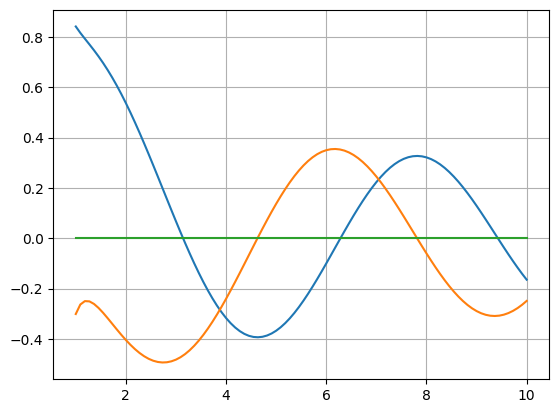

In [ ]:
import matplotlib.pyplot as plt
import torch as th

fx = lambda x: th.sin(x)/(th.log(x)+1)
gx = lambda x: 0*x

x = th.linspace(1,10,100)
plt.plot(x, fx(x)) #синий
plt.plot(x, np.array(Xgrad)) #красный
plt.plot(x, gx(x)) #зеленый
plt.grid(True)
plt.show()

<p class="task" id="5"></p>

5\. Дана функция $f(x)$. Найдите производную данной функции $f'(x)$ на отрезке [0, 10] при помощи формулы производной сложной функции. На этом же отрезке найдите, используя возможности по автоматическому дифференцированию пакета `torch`. Сравните результаты.

$$f(x) = sin(cos(x))$$

- [ ] Проверено на семинаре

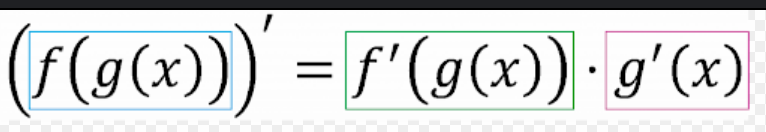

In [ ]:
import torch as th
import matplotlib.pyplot as plt

def g(x: th.Tensor) -> th.Tensor:
    return th.sin(x)

def h(x: th.Tensor) -> th.Tensor:
    return th.cos(x)

def dgdx(x: th.Tensor) -> th.Tensor:
    y = g(x)
    y.backward(th.ones_like(x))
    Xgrad = x.grad
    return Xgrad

def dfdg(x: th.Tensor) -> th.Tensor:
    y = dgdx(x)
    y.backward(th.ones_like(x))
    Xgrad = x.grad
    return Xgrad

def dfdx(x: th.Tensor) -> th.Tensor:
    return dfdg(x)*dgdx(x)

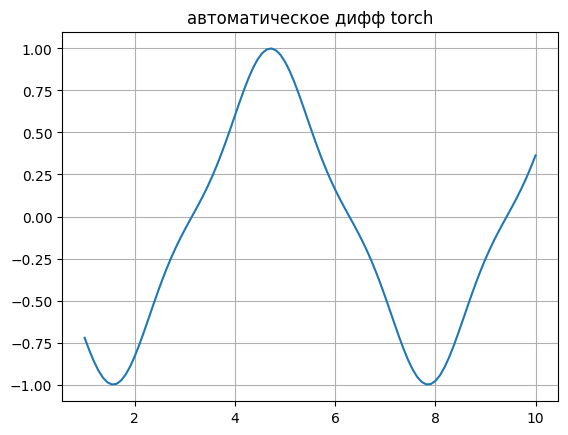

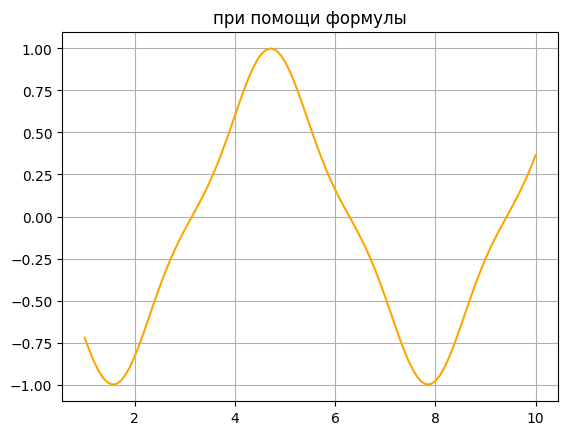

In [ ]:
x = th.linspace(1,10,100)
dcomplex_f = lambda x: -th.cos(th.cos(x))*th.sin(x)
plt.plot(x, dfdx(x)) #синий
plt.grid(True)
plt.title('автоматическое дифф torch')
plt.show()
plt.plot(x, dcomplex_f(x), color='orange')
plt.grid(True)
plt.title('при помощи формулы')
plt.show()